# Notebook Inports and Packages
## This just more markdown
### and another

In [97]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map


from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# this is for export???
%matplotlib inline

# Example 1 - A simple cost function
## $f(x) = x^2 + x + 1$
### centered Latex $$f(x) = x^2 + x + 1$$

In [98]:
# create the function
def f(x):
    return x**2 + x + 1

In [99]:
# generate data w/ numpy
# linspace generates numbers between start and stop
# and will generate 100 based on num
x_1 = np.linspace(start=-3, stop=3, num=100)
# could also write this as...
# x_1 = np.linspace(-3, 3, 100)
# run it
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

<function matplotlib.pyplot.show(*args, **kw)>

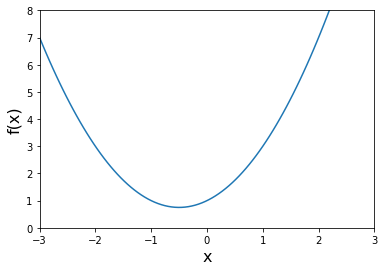

In [100]:
# plot the data
# format it
plt.xlim([-3, 3])
plt.xlabel('x', fontsize=16)
plt.ylim(0, 8)
plt.ylabel('f(x)', fontsize=16)
# plot it
plt.plot(x_1, f(x_1))
# display it
plt.show

## Slope & Derivatives

In [101]:
# derivative function
def df(x):
    return 2*x + 1

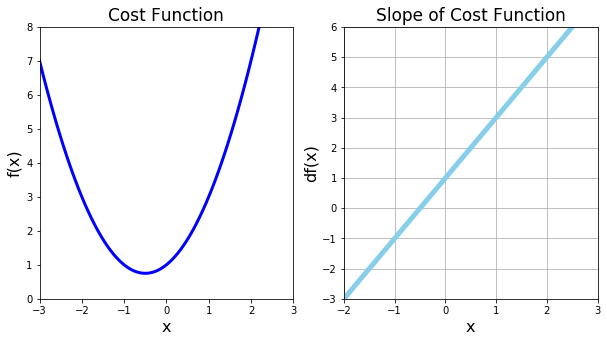

In [102]:
# plot function and derivative side by side with the function plot
plt.figure(figsize=[10,5])
# plot them side by side
# args are row, number of columns, index
plt.subplot(1, 2, 1)
# plot the cost function
# format it
plt.xlim(-3, 3)
plt.ylim(0,8)
plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
# plot it
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# plot the derivative function
# this one is index 2
plt.subplot(1, 2, 2)
# format it
plt.xlim(-2, 3)
plt.ylim(-3,6)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
# uncomment this to plot both on the same graph
# plt.plot(x_1, f(x_1))
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

<function matplotlib.pyplot.show(*args, **kw)>

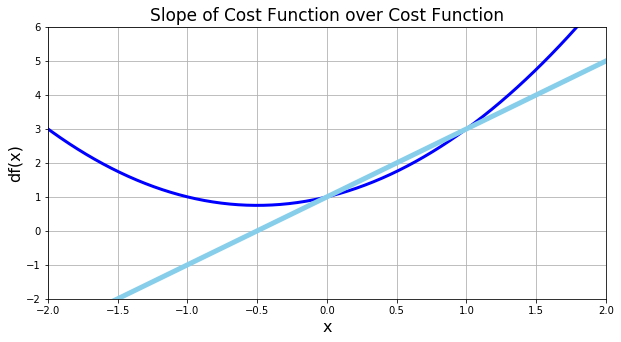

In [103]:
plt.figure(figsize=[10,5])
# overlay them
# not in the course
# format it
plt.xlim(-2, 2)
plt.ylim(-2, 6)
plt.title('Slope of Cost Function over Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
# uncomment this to plot both on the same graph
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
# display it
plt.show

## Python Loops and Gradient Descent

In [104]:
# gradient descent loop
new_x = 3
previous_x = 0
step_multiplier = 0.1

for n in range(30):
    previous_x = new_x
    # calulate derivative
    gradient = df(previous_x)
    #  new value of X is equal to the previous value of X minus (b/c we get to go down the slope)
    # our step multiplier times the gradient
    # this is the value of the slope at the previous value
    new_x = previous_x - step_multiplier * gradient
    
print('Local minimum occurs at: ', new_x)
print('slope of df(x) value at this point is: ', df(new_x))
print('f(x) value (cost) at this point is: ', f(new_x))

Local minimum occurs at:  -0.4956672098625011
slope of df(x) value at this point is:  0.008665580274997753
f(x) value (cost) at this point is:  0.7500187730703756


In [105]:
# gradient descent loop with more loops
# more accurate
new_x = 3
previous_x = 0
step_multiplier = 0.1

# changed to 500
# brute forcing the answer
for n in range(500):
    previous_x = new_x
    # calulate derivative
    gradient = df(previous_x)
    #  new value of X is equal to the previous value of X minus (b/c we get to go down the slope)
    # our step multiplier times the gradient
    # this is the value of the slope at the previous value
    new_x = previous_x - step_multiplier * gradient
    
print('Local minimum occurs at: ', new_x)
print('slope of df(x) value at this point is: ', df(new_x))
print('f(x) value (cost) at this point is: ', f(new_x))

Local minimum occurs at:  -0.4999999999999999
slope of df(x) value at this point is:  2.220446049250313e-16
f(x) value (cost) at this point is:  0.75


In [106]:
# gradient descent loop with more loops
# and a precision setting
# more accurate
new_x = 3
previous_x = 0
step_multiplier = 0.1
# this is the value of the slope
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    # calulate derivative
    gradient = df(previous_x)
    #  new value of X is equal to the previous value of X minus (b/c we get to go down the slope)
    # our step multiplier times the gradient
    # this is the value of the slope at the previous value
    new_x = previous_x - step_multiplier * gradient
    # adding for precision
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    # need this oplotting
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('loop run count: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('slope of df(x) value at this point is: ', df(new_x))
print('f(x) value (cost) at this point is: ', f(new_x))

loop run count:  40
Local minimum occurs at:  -0.49962781616118024
slope of df(x) value at this point is:  0.0007443676776395236
f(x) value (cost) at this point is:  0.7500001385208099


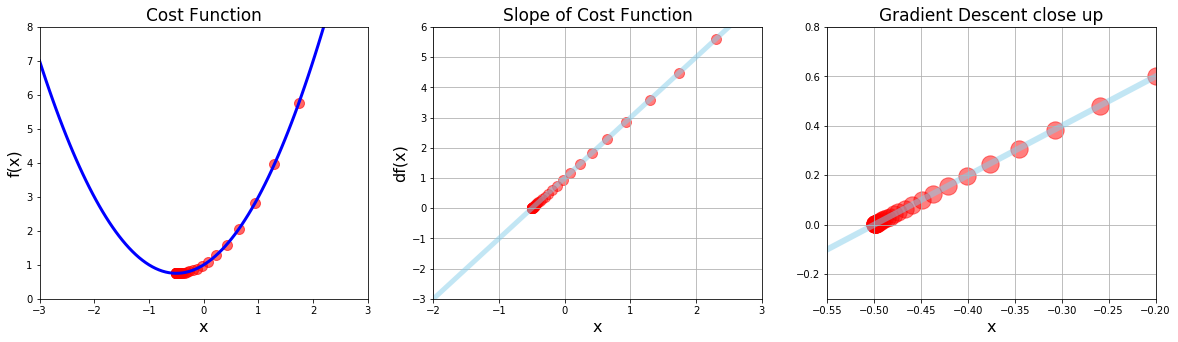

In [107]:
# superimpose gradient descent calulations on plot
plt.figure(figsize=[20,5])
# plot them side by side
# args are row, col, index
plt.subplot(1, 3, 1)
# plot the cost function
# format it
plt.xlim(-3, 3)
plt.ylim(0,8)
plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
# plot it
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# add a scatter chart
# have to type convert since it's a list and it needs a array
values = np.array(x_list)
# s is size
# alpha is transparency
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# plot the derivative function
# this one is index 2
plt.subplot(1, 3, 2)
# format it
plt.xlim(-2, 3)
plt.ylim(-3,6)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
# uncomment this to plot both on the same graph
# plt.plot(x_1, f(x_1))
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.5)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# chart 3 Derivative close up
# this one is index 2
plt.subplot(1, 3, 3)
# format it
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3,0.8)
plt.title('Gradient Descent close up', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.grid()
# uncomment this to plot both on the same graph
# plt.plot(x_1, f(x_1))
plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.5)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)


plt.show()

# Example 2 Multiple Minima vs Initial Guess & Advanced Functions
## $$g(x) = x^4 -4x^2 +5$$

In [108]:
# generate data
x_2 = np.linspace(-2, 2, 1000)

# define g(x)
def  g(x):
    return x**4 - 4*x**2 + 5

# define derivative dg(x)
def  dg(x):
    return 4*x**3 - 8*x

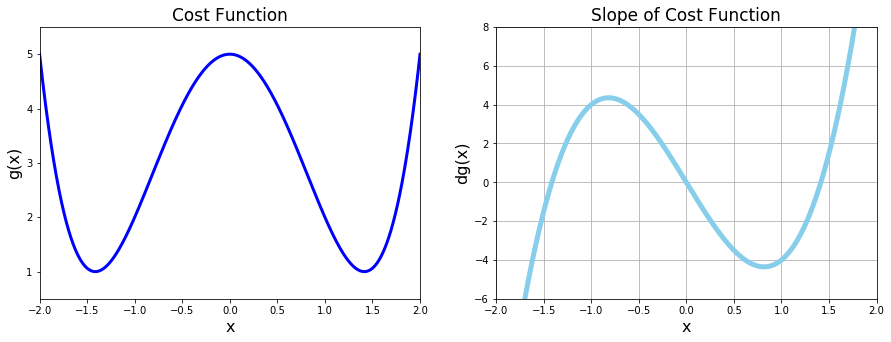

In [109]:
# plot function and derivative side by side with the function plot
plt.figure(figsize=[15,5])
# plot them side by side
# args are row, number of columns, index
plt.subplot(1, 2, 1)
# plot the cost function
# format it
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
# plot it
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# plot the derivative function
# this one is index 2
plt.subplot(1, 2, 2)
# format it
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

## Gradient Descent as a Python Function

In [110]:
# define function with default values for multiplier and precision
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [111]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.01, 0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4137636556157256
Number of steps: 56


In [112]:
local_min, list_x, deriv_list = gradient_descent(dg, -0.5)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


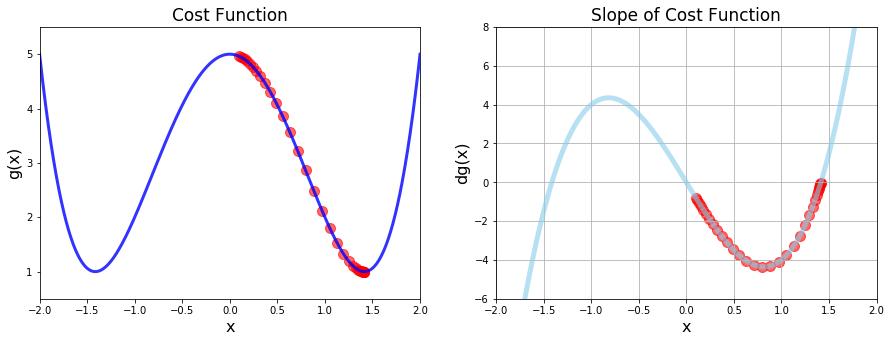

In [113]:
# calling gradeint descent function
local_min, list_x, deriv_list = gradient_descent(dg, 0.1)

#plot function and derivative and scatter side by side
plt.figure(figsize=[15,5])
# plot them side by side
# args are row, number of columns, index
plt.subplot(1, 2, 1)
# plot the cost function
# format it
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

# plot it
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# scatter plot
# converting list to an array inline
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# plot the derivative function
# this one is index 2
plt.subplot(1, 2, 2)
# format it
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)

# scatter plot
# converting list to an array inline
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

# Example 3 - divergence overflow and Python tuples 
## $$h(c) =x^5 -2x^4 + 2$$

In [114]:
# generate data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

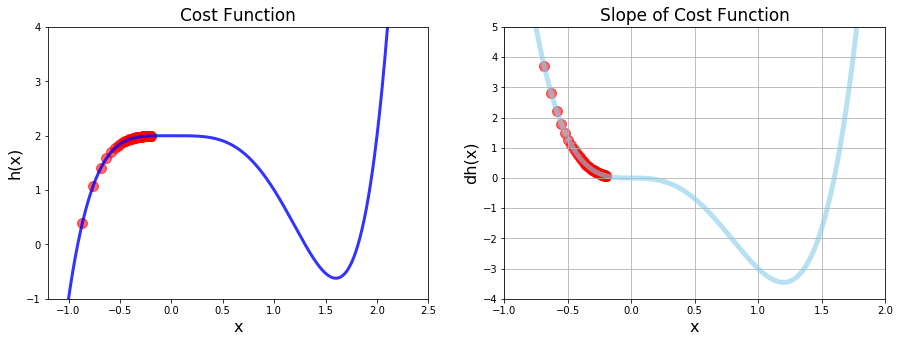

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [115]:
# calling gradeint descent function
local_min, list_x, deriv_list = gradient_descent(dh, -0.2, max_iter=70)

#plot function and derivative and scatter side by side
plt.figure(figsize=[15,5])
# plot them side by side
# args are row, number of columns, index
plt.subplot(1, 2, 1)
# plot the cost function
# format it
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

# plot it
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)

# scatter plot
# converting list to an array inline
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# plot the derivative function
# this one is index 2
plt.subplot(1, 2, 2)
# format it
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)

# scatter plot
# converting list to an array inline
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))


In [116]:
# see what the max number we can deal with
import sys
#help(sys)
sys.version
sys.float_info.max

1.7976931348623157e+308

# Python Tuples
## CSV values

In [117]:
# creating a tuple via tuple packing
breakfast = 'bacon', 'egg', 'toast'
unluck_numbers = 13, 4, 9, 26, 17
print(breakfast[1])

# reverse
main, side1, side2 = breakfast
print(side2)

# that is the same as this line above:
# local_min, list_x, deriv_list = gradient_descent(dh, -0.2, max_iter=70)
data_tuple = gradient_descent(dh, -0.2, max_iter=70)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

egg
toast
Local min is -2071072.4470816324
Cost at the last x value is -3.810455326061589e+31
Number of steps is 71


# Learning Rate

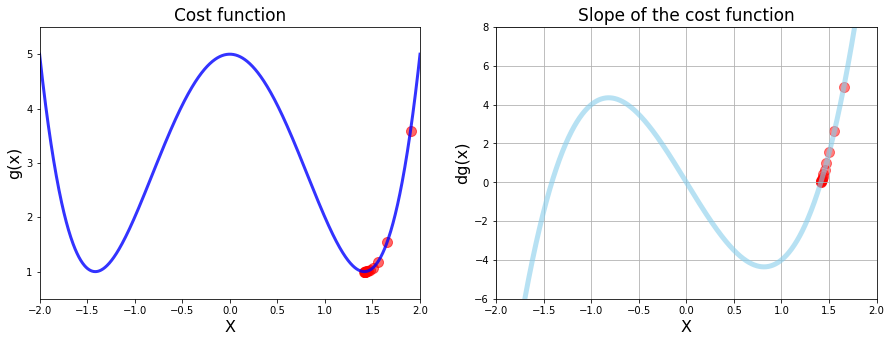

Number of steps is:  14


In [118]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

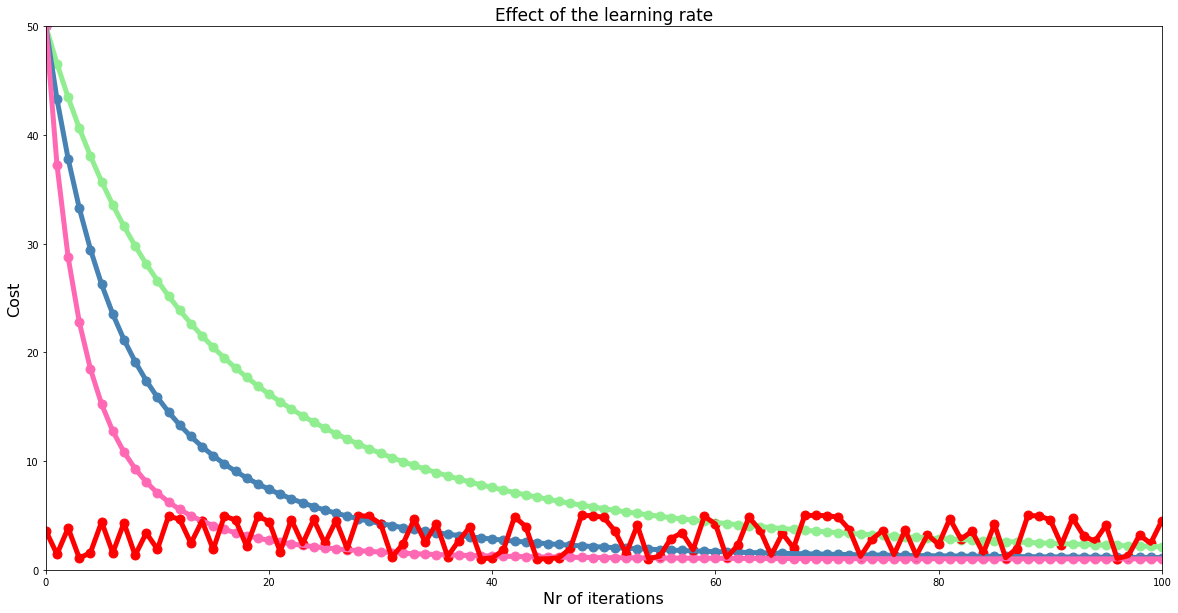

In [119]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)


plt.show()

# Example 4 - Data Vizualization with 3D Charts

## Minimize $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [120]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [121]:
# just a matric example so we know how this works
# generate x and y data
# play with num args to see the different
x_4a = np.linspace(start=-2, stop=2, num=5)
y_4a = np.linspace(start=-2, stop=2, num=5)

print('Shape of X array', x_4.shape)

# export to a 2D array using numpy
x_4a, y_4a = np.meshgrid(x_4a, y_4a)
print('Array after meshgrid: ', x_4a.shape)
print(x_4a)

Shape of X array (200, 200)
Array after meshgrid:  (5, 5)
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]


In [122]:
# generate x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

# export to a 2D array using numpy
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


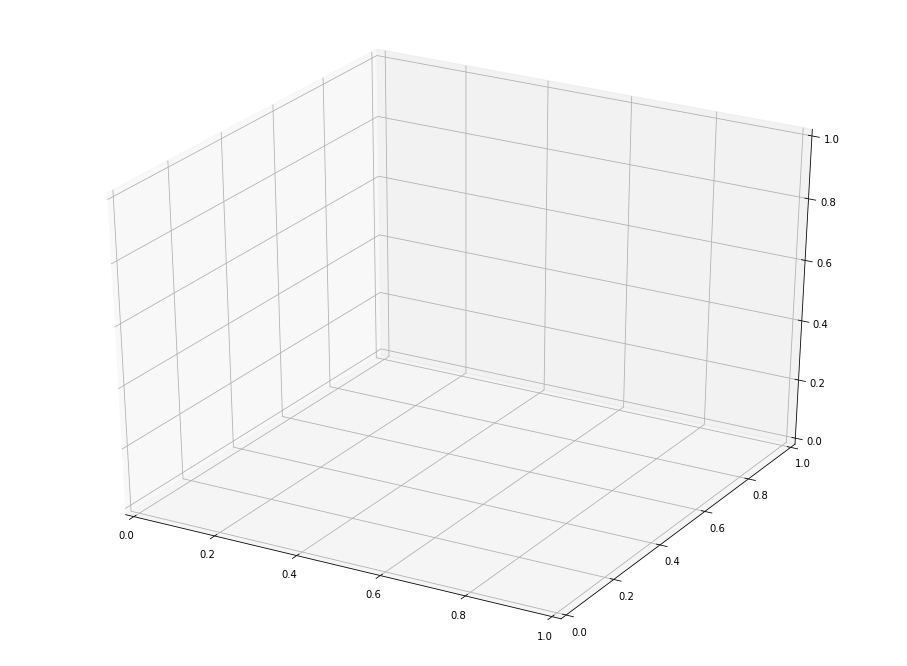

In [123]:
# Generate blank 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

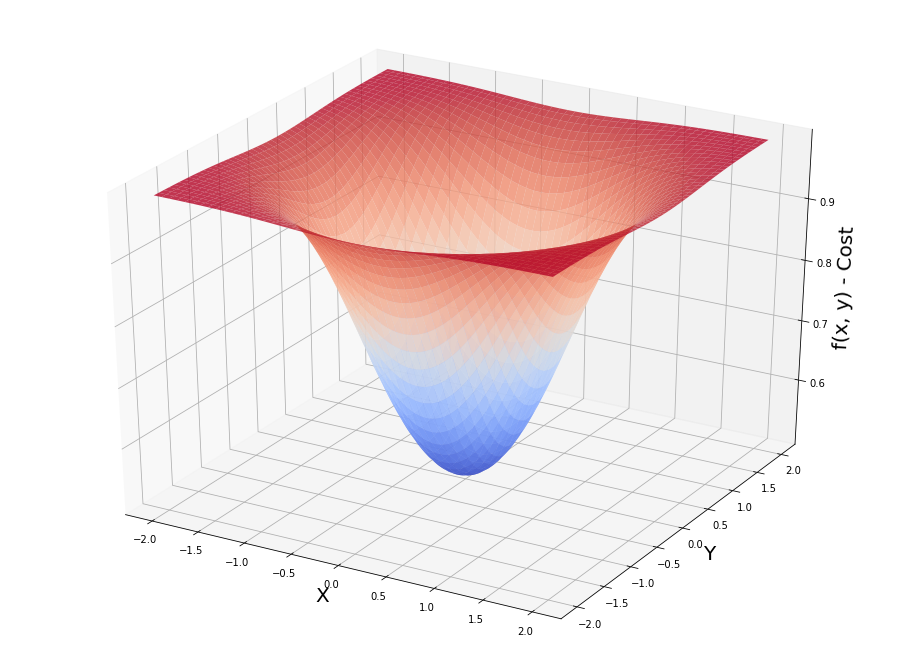

In [124]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.8)

plt.show()

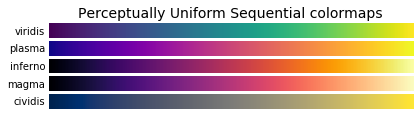

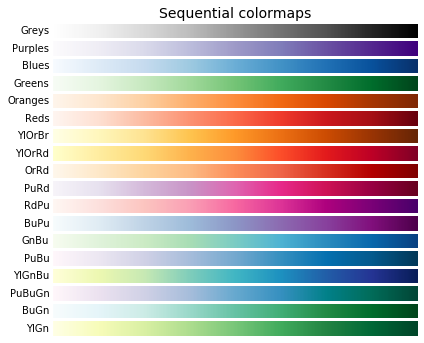

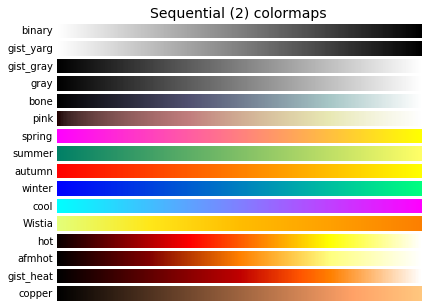

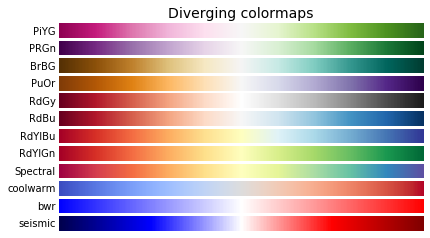

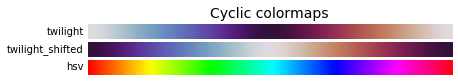

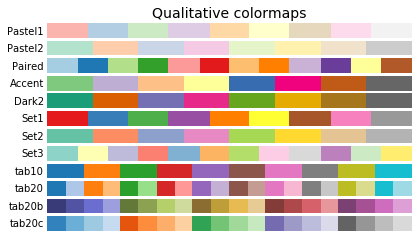

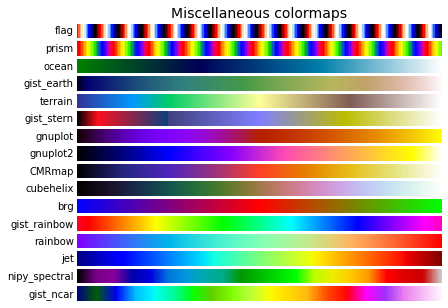

In [125]:
# extra section on color maps
# from https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

# Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [126]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [127]:
# a stands for x and b stands for y
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
# this part
# subs={a:1.8, b:1.0}
# gives values to a and b
# it's a dictionary 
print(f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
0.990604794032582
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


In [128]:
# Partial derivative functions
# log function requires import math
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [129]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Batch Gradient Descent with SymPy

In [130]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [131]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
# reshape uses number of rows, columns as args
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


In [132]:
# Advanced Numpy Array Practice:
# comment and uncomment print statements to see how this works
# 1x2 array
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

# the index to access these will retrun both items in the []'s'
# 2x2 array
hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]  :   ', hs_band[0])
print('hs_band[0][1]   :   ', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames   :   ', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]  :    ['Black Thought' 'MC']
hs_band[0][1]   :    Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames   :    ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


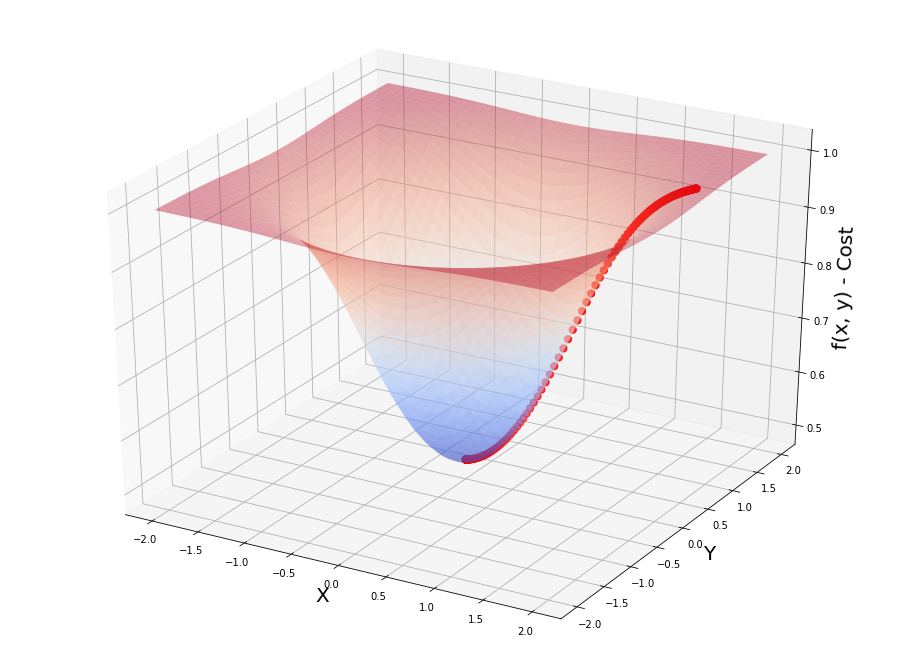

In [133]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [134]:
# Generate sample data
# _5 for 5th example
# 1x7 arrays
# there's an issue with regr.fit that can be fixed 1 of ways
# .transpose
# take a one dimensional array which was just seven values and make it into
# two dimensions even though it's only got one column 
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
# .reshape
# supply how many rows and columns
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [135]:
# Linear Regression
# requires sklearn import
# from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_5, y_5)
# print intercept
print('Theta 0 (intercept):', regr.intercept_[0])
# print slope
print('Theta 1 (slope):', regr.coef_[0][0])

Theta 0 (intercept): 0.8475351486029536
Theta 1 (slope): 1.2227264637835915


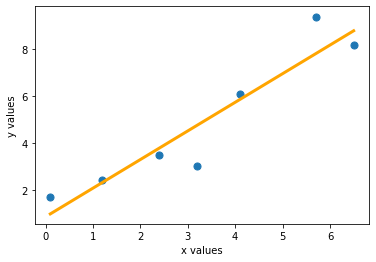

In [136]:
# plot it
# this is best fit line
# not the cost function
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [137]:
# which is 'y^'
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [138]:
# function mse(y, y_hat) returns the MSE 

def mse(y, y_hat):
    # all of these work
    mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    # numpy library
    #mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [139]:
# print the values
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [149]:
#nr_thetas = 5
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
# print the array
#plot_t0

### Calc MSE using nested for loops

In [158]:
# create an array of 0's
plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

# print it
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

In [157]:
# print the dimensions
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [155]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


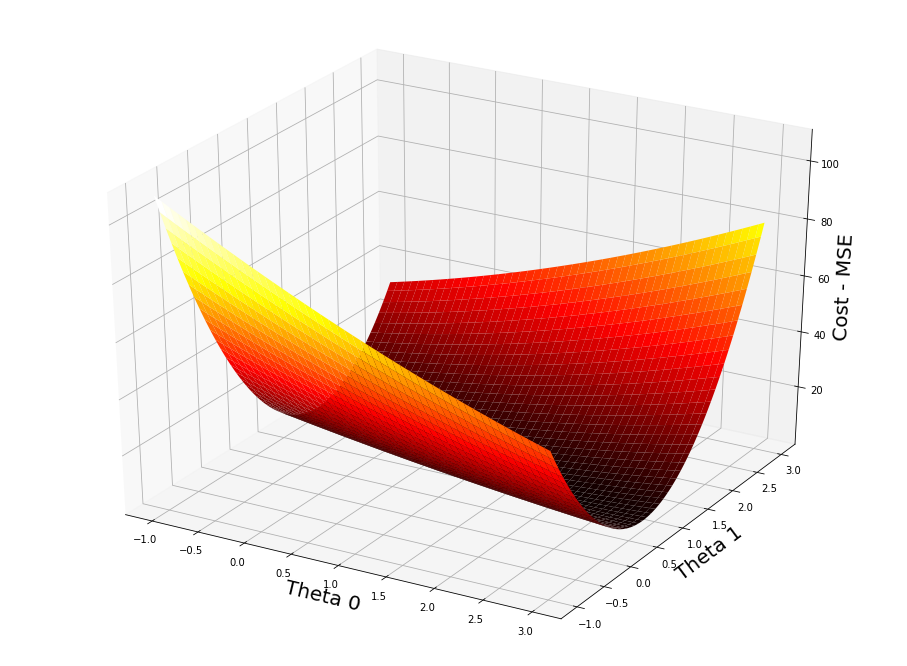

In [161]:
# plot it
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
#ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.winter)
plt.show()

In [163]:
print('Min value of plot_cost', plot_cost.min())
# this is from the lecture but is deprectaed
# ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
# this is not deprecated
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747163
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [164]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # theta0_slope
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    # theta1_slope
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    # any of these three will work
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [165]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


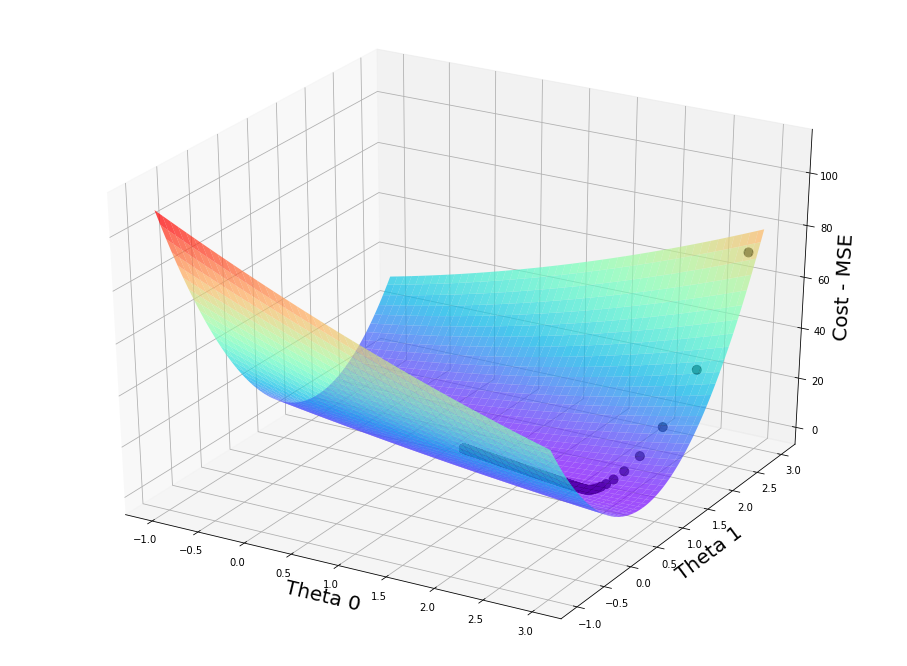

In [167]:
# plot MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.7)
plt.show()